In [32]:
import pandas as pd
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima_model import ARIMA
import itertools
%matplotlib inline

In [10]:
#df = pd.read_csv('preprocessed.csv')
df = pd.read_csv('mv_port_processed.csv')

In [11]:
df['Date']

0          201711
1          201712
2          201801
3          201802
4          201803
            ...  
1269166    201902
1269167    201903
1269168    201904
1269169    201905
1269170    201906
Name: Date, Length: 1269171, dtype: int64

In [12]:
#df = df.rename(columns={'Project_Number': 'Project Number', 'Project_Name' : 'Project Name'})
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Project Number'] = df['Project Number'].astype('str') 
#df['Fiscal Period Code'] = pd.to_datetime(df['Fiscal Period Code'], format='%Y%m') 

In [13]:
len(df)

1269171

In [11]:
df['Ultimate Customer AUS Market Sector'].fillna('Unspecified', inplace=True)
df['Ultimate Customer AUS Market Sector'].unique()

array(['Unspecified', 'Municipalities/Local Govt.',
       'State/Regional Government', 'Chemicals',
       'Central/Federal Government', 'Life Sciences', 'Mining & Metals',
       'Commercial Developers', 'Rail', 'Technology',
       'Power Companies/Utilities', 'Automotive', 'Aerospace',
       'Oil & Gas', 'Conglomerates', 'Fin. Institutions/Investors',
       'Consumer Goods & Retail', 'Ports/Transportation',
       'Water Companies/Utilities', 'Education', 'Non-Rail',
       'Other Private', 'Healthcare', 'Institutional Agencies',
       'Intercompany'], dtype=object)

In [12]:
df['Division Short Name'].unique()

array(['Environment', 'Water', 'Buildings', 'Infrastructure',
       'Enabling Function', nan], dtype=object)

In [9]:
df_gov = df[df['Ultimate Customer AUS Market Sector'] == 'State/Regional Government']
len(df_gov)

12654

In [10]:
df_gov['Project Number'].nunique()

754

In [14]:
## create a dataframe for the analysis, where we only keep the last Project Numbers
df1 = (df.drop_duplicates(subset='Project Number', keep= 'last').reset_index(drop=True))
len(df1)

78128

In [15]:
def analysis(column):
    print(df1[column].unique())
    sub = df1.groupby(column).count()
    # plot the dataframe 
    return sub.plot(y=["Project Number"], kind="bar", figsize=(9, 8))

In [23]:
def analysis_unspecified(column):
    print(df1[column].unique())
    sub=df1.groupby([column, 'Project Number']).size().reset_index().rename(columns={0:'count'})
    sub=sub.groupby(column).count()
    sub.pop('Project Number')
    
    sub.reset_index(inplace=True)
    sub.sort_values('count', inplace=True, ascending=False)
    sub = sub[sub[column] != 'Unspecified']
    sub.set_index(column, inplace=True)
    

    # plot the dataframe 
    
    return sub.plot(kind="bar", figsize=(13, 8))

### What are the most common contract types?

['Time and Material with cap' 'Lump Sum' 'Unspecified'
 'Cost plus Fixed Fee' 'Time and Material' 'Lump Sum with IFRS'
 'Revenue group' nan 'H']


<AxesSubplot:xlabel='Contract Type Name'>

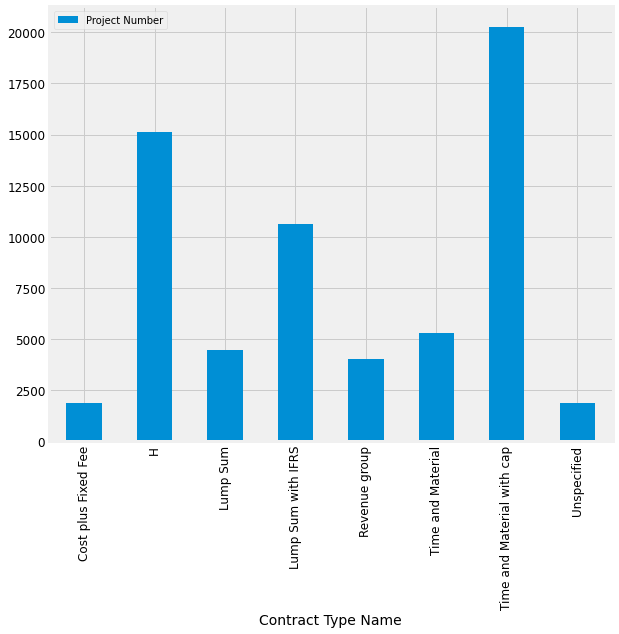

In [24]:
analysis('Contract Type Name')

### Which are the most common customer market sectors?

[nan 'Oil & Gas' 'Municipalities/Local Govt.' 'Water Companies/Utilities'
 'State/Regional Government' 'Chemicals' 'Life Sciences' 'Intercompany'
 'Commercial Developers' 'Aerospace' 'Consumer Goods & Retail'
 'Power Companies/Utilities' 'Conglomerates' 'Institutional Agencies'
 'Rail' 'Central/Federal Government' 'Mining & Metals' 'Technology'
 'Automotive' 'Ports/Transportation' 'Unspecified' 'Education'
 'Other Private' 'Fin. Institutions/Investors' 'Healthcare' 'Non-Rail']


<AxesSubplot:xlabel='Ultimate Customer AUS Market Sector'>

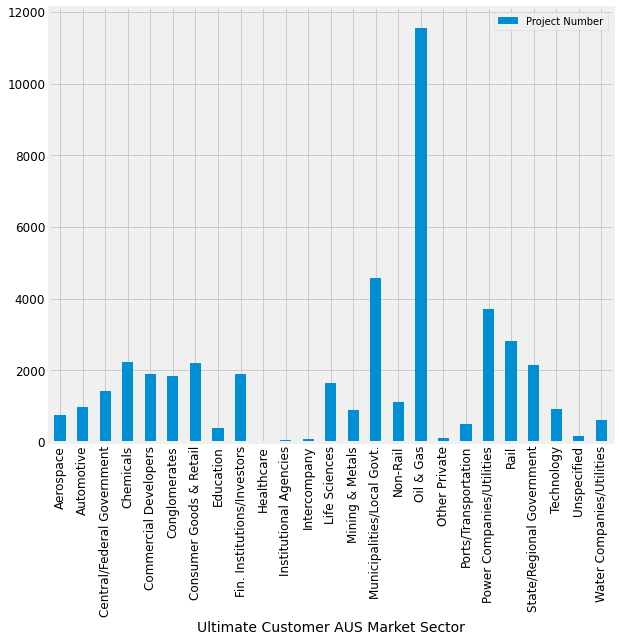

In [25]:
analysis('Ultimate Customer AUS Market Sector')

### Which are the most common Arcadis Divisions ?

['Infrastructure' 'Environment' 'Water' 'Enabling Function']


<AxesSubplot:xlabel='Division Short Name'>

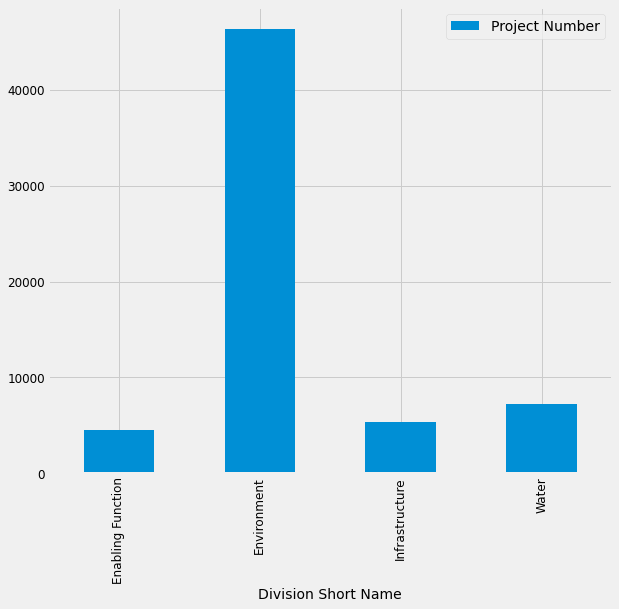

In [20]:
analysis('Division Short Name')

In [7]:
f" There are {len(df['SalesCloudClientNo'].unique())} unique clients"

' There are 3280 unique clients'

In [8]:
f" There are {len(df['Project Number'].unique())} unique projects"

' There are 63522 unique projects'

### What are the detailed project types?

[nan 'Site Evaluation and Restoration' 'Water Supply and Treatment'
 'Water Management' 'Environmental Planning' 'Program Management (PM)'
 'Rail & Urban Transport' 'Strategic Environmental Consulting'
 'Highways & ITS' 'Master Planning & Sustainable Urban Development'
 'Conveyance' 'Water for Industry' 'Environmental Construction Services'
 'Performance Driven Engineering (PDE)' 'Business Advisory'
 'Airport Solutions' 'Ports and Industrial Infrastructure Solutions'
 'Mining Solutions' 'GRIP' 'Contract Solutions' 'Cost Management (CM)'
 'Commercially Led Program Management'
 'Performance Driven Architecture (PDA)' 'Overhead Project']


<AxesSubplot:xlabel='Proj_CVP'>

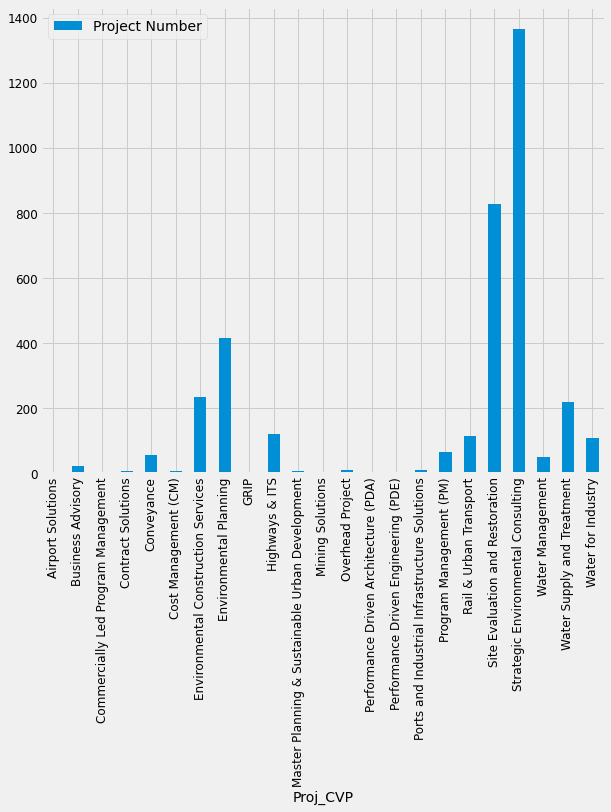

In [25]:
analysis('Proj_CVP')

### This is data from North America, where are most projects located?

['Georgia, US' 'Pennsylvania, US' 'Montana, US' 'New York, US'
 'Illinois, US' 'Alabama, US' 'Ohio, US' 'California, US' 'Florida, US'
 'Missouri, US' 'Maryland, US' 'Michigan, US' 'Nevada, US' nan
 'Arizona, US' 'Tennessee, US' 'Texas, US' 'Wisconsin, US' 'Virginia, US'
 'North Dakota, US' 'New Mexico, US' 'Oregon, US' 'Alaska, US'
 'Massachusetts, US' 'Kentucky, US' 'Iowa, US' 'New Hampshire, US'
 'District of Columbia, US' 'Oklahoma, US' 'Indiana, US' 'Connecticut, US'
 'Delaware, US' 'West Virginia, US' 'Arkansas, US' 'North Carolina, US'
 'Wyoming, US' 'New Jersey, US' 'Louisiana, US' 'Mississippi, US'
 'Maine, US' 'South Carolina, US' 'Washington, US' 'Quebec, CA'
 'Colorado, US' 'Nebraska, US' 'Utah, US' 'British Columbia, CA'
 'Idaho, US' 'Kansas, US' 'Rhode Island, US' 'Hawaii, US' 'Alberta, CA'
 'Minnesota, US' 'NO' 'Puerto Rico, PR' 'Ontario, CA' 'MAH'
 'Saskatchewan, CA' 'NSW' 'QLD' 'LONDON' 'South Dakota, US'
 'Virgin Islands, US' 'LINCS' 'VIC' 'STAFFS' 'Unspecified'
 'New

<AxesSubplot:xlabel='Region'>

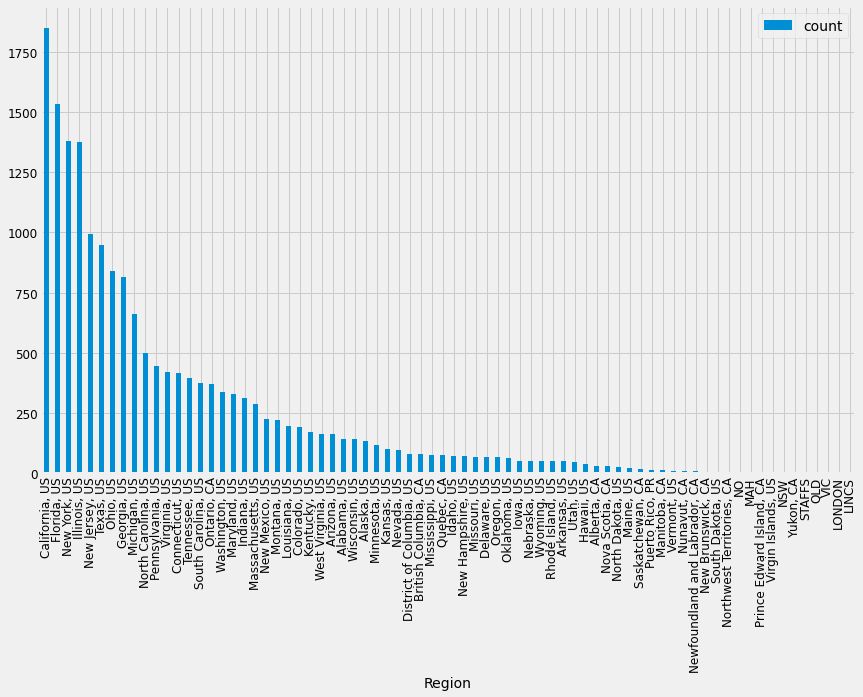

In [33]:
analysis_unspecified('Region')

### Which are the most common client industries in detail?

['DOT - State Transportation' 'CP - Chem/Pharma' 'RL - Freight Rail'
 'EL - Technology, Telecomm & Electronics'
 'EE - Engineering, Environmental & Construction Management'
 'MU - Municipal' 'OG - Oil & Gas' 'AE - Aerospace'
 'PvtEd - Private Education' 'AU - Automotive' 'CR - Consumer & Retail'
 'PubEd - Public Education' 'IC - Arcadis Intercompany' 'PA - Pulp/Paper'
 'CONG - Conglomerate' 'PC - Power Companies/Utilities'
 'TRN - Transportation (Non-Rail Road)' 'IN - Internal'
 'CD - Commercial Developers' 'MM - Mining/Metals' 'CT - Contractors'
 'FIN - Financial' 'INS - Insurance' 'FED - Federal'
 'WC - Water Companies/Utilities' 'TS - Transit'
 'DC - Digital & Creative Industries' 'LOG - Logistics'
 'PPA - Ports/Public Authority' 'F&BP - Food & Bev Producers'
 'ST - State/Provinces' 'TC - Telecom Utilities' 'DOD - Dept of Defense'
 'PvtHC - Private Healthcare Institutions' 'NP - Non-Profit'
 'BLD - Building Materials & General Manufacturing'
 'PubHC - Public Healthcare Institutions'

<AxesSubplot:xlabel='primary_client_industry'>

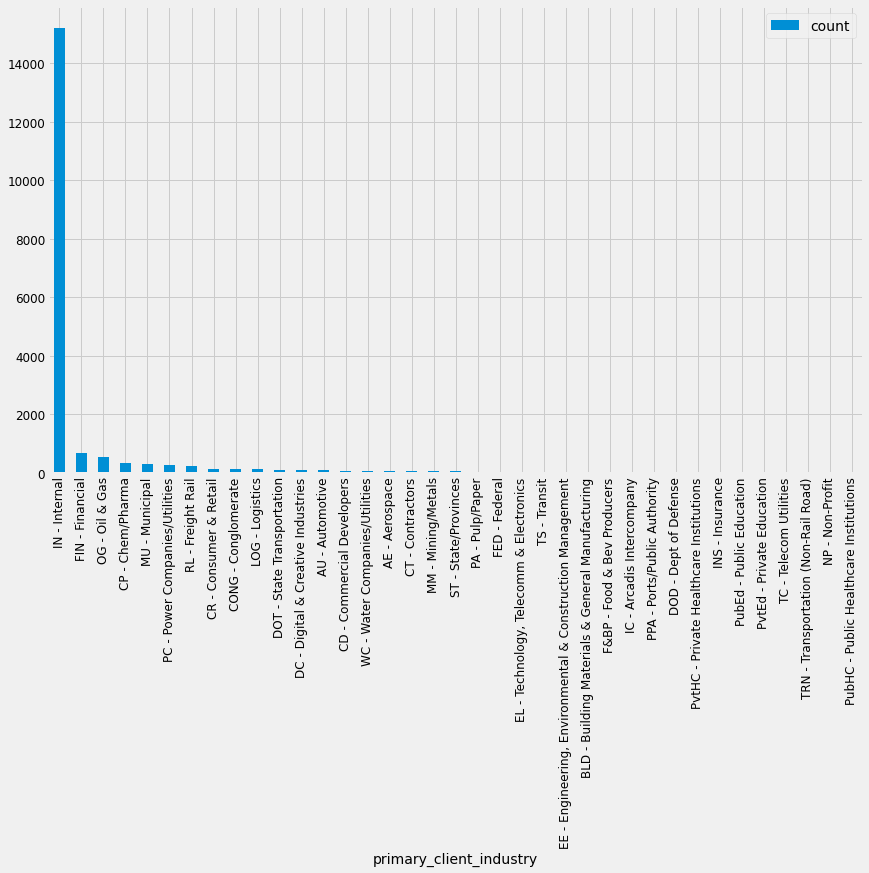

In [34]:
analysis_unspecified('primary_client_industry')

### How is the risk distributed acorss projects?

['Unspecified' 'Medium' 'Low' 'High']


<AxesSubplot:xlabel='Risk Profile'>

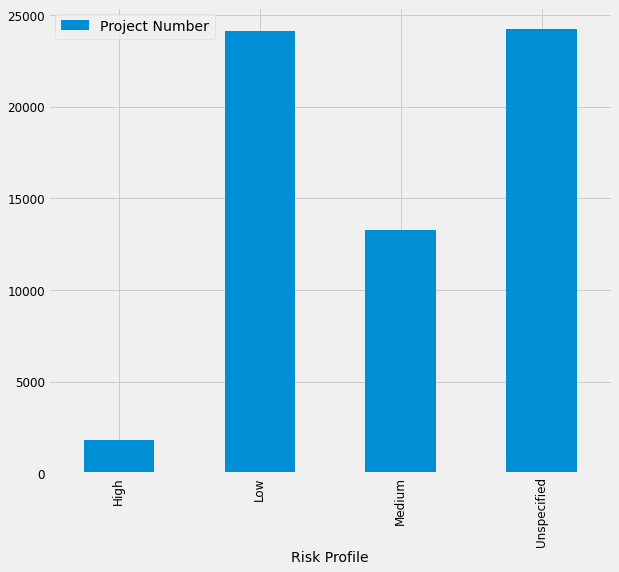

In [31]:
analysis('Risk Profile')

### What is the risk rating distribution?

[ 1.  2.  3.  5.  4. nan]


<AxesSubplot:xlabel='riskrating_project'>

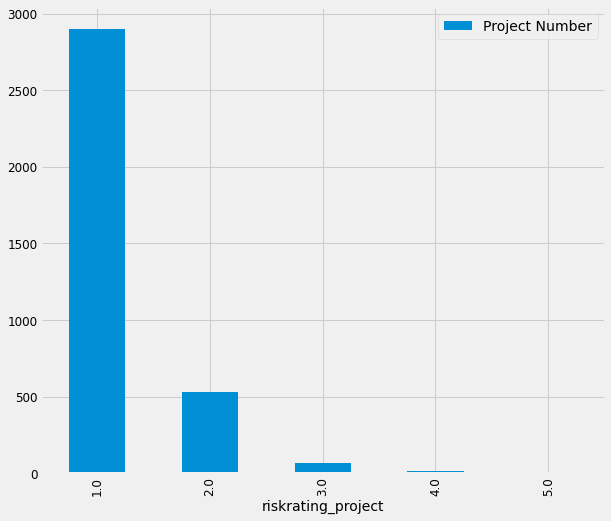

In [33]:
analysis('riskrating_project')

### How large are the Organizations that the company works with?

['RKC' 'Local' 'GKC' 'Key Regional' 'Key Local' 'Unspecified' 'Key Global']


<AxesSubplot:xlabel='Organization Size'>

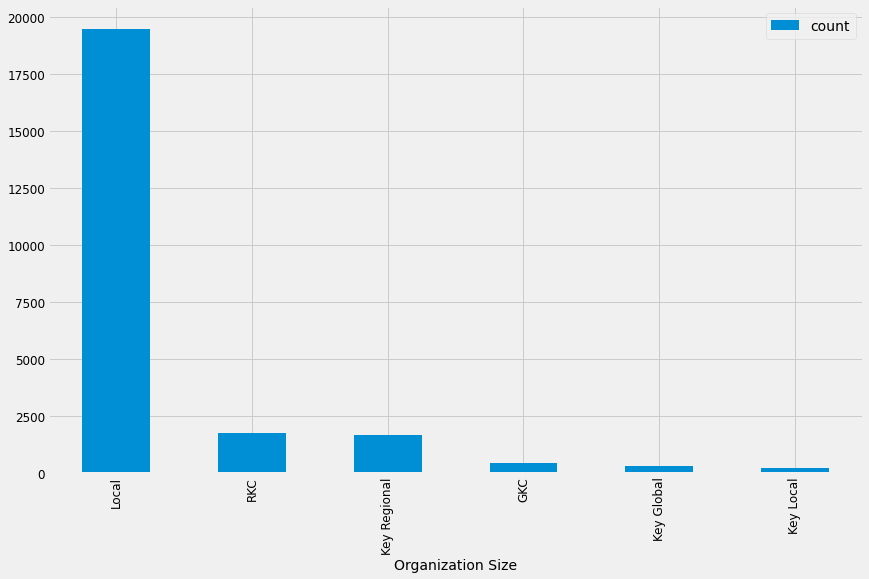

In [35]:
analysis_unspecified('Organization Size')

In [36]:
df1.columns

Index(['Fiscal Period Code', 'Project Number', 'Project Id', 'Project Name',
       'Health and Safety Status', 'project_date_create', 'Project Status',
       'SalesCloudClientNo', 'Related Opportunity Project Number',
       'Contract Type Name', 'Ultimate Customer AUS Market Sector',
       'Division Short Name', 'location_2', 'location_4', 'Region', 'City',
       'Country', 'Country Name', 'Proj_CVP', 'Proj_Serv_Offering',
       'CVP Description', '﻿CVP Code', 'primary_client_industry',
       'Sales Cloud Opportunity Number', 'Funding Amount - ITC (Snapshot)',
       'Backlog NR', 'Actual Direct Labor Cost - MTD',
       'Actual Non-Labor Cost - MTD', 'Actual Gross Revenue - MTD',
       'Actual Net Revenue - MTD', 'EBITA - MTD',
       'Forecast Direct Labor Cost - ITC', 'Forecast Net Revenue - ITC',
       'Order Intake (NR) - MTD', 'WBS1', 'bookings_jtd', 'interest_current',
       'interest_jtd', 'interest_ytd', 'multiplier_budget',
       'multiplier_current', 'multiplier_t

['On Hold - Inactive' 'Open/Active' 'Closed' 'Unspecified' 'New'
 'Final Closure Requested' 'Closed-Open to Collect'
 'New - Pending Approval']


<AxesSubplot:xlabel='Project Status'>

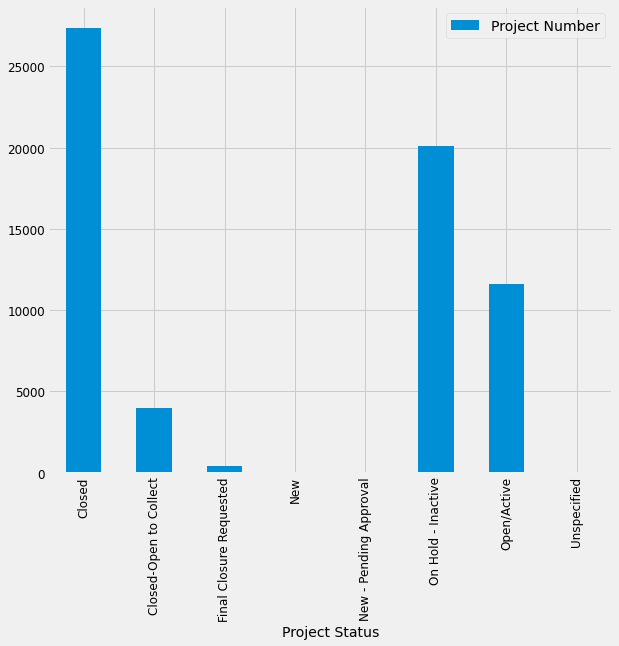

In [41]:
analysis('Project Status')

In [27]:
df1[['Project Number']] = df1[['Project Number']].apply(lambda x: x.str.lower())
df2 = df1.drop_duplicates(subset=['Date','Project Number'], keep = 'first')
len(df2)

78128

### Let's take out any project numbers that are not unique per time period

In [30]:
df3 = df2.drop_duplicates(subset=['Project Number'], keep = 'last')

def analysis(column):
    print(df3[column].unique())
    sub = df3.groupby(column).count()
    # plot the dataframe 
    return sub.plot(y=["Project Number"], kind="bar", figsize=(20,8))

[20  9  7  5 19 18  6  1 27 22 38 28 21 37 26 13 25 15 30 39 14 29 48 36
 11 34 40 24  4 12 33 10 46 42 44 17 23 35 16 32 31 47  8 45  3 43 41 63
 61 52 49 58 62 59 53 51 60 55 56 54 57 50  2]


<AxesSubplot:xlabel='Projectduration'>

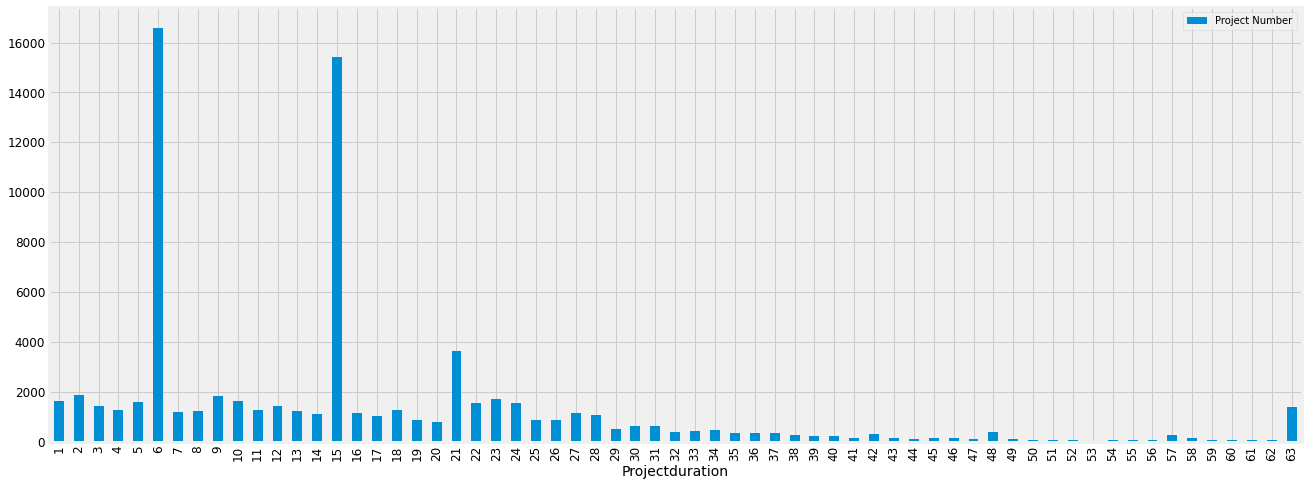

In [31]:
analysis('Projectduration')

### Let's add a columm to add up all actual net revenue (cumulative sum)

In [33]:
df2['ActualNR_sum'] = df2.groupby("Project Number")['Actual Net Revenue - MTD'].cumsum()

### Let's see which SalescloudClientNO has most projects

In [34]:
df_combo=df2.groupby([ "SalesCloudClientNo", "Project Number"] ).size().to_frame(name = 'count').reset_index()
dfdf_combo=df_combo.groupby('SalesCloudClientNo').count()
dfdf_combo.pop('Project Number')


#This should be the names with more than two numbers
dfdf_combo.reset_index(inplace=True)
dfdf_combo.sort_values('count', 
                      inplace=True, 
                      ascending=False)
dfdf_combo

,SalesCloudClientNo,count
6,99999.0,15316
83,10238092.0,3106
923,10239479.0,2238
165,10238206.0,1396
910,10239458.0,974
...,...,...
565,10238865.0,1
1627,10240961.0,1
1628,10240963.0,1
564,10238862.0,1


### Let's see which project types have most revenue

In [35]:
def average_nr(column):
    dff=df3.groupby([column])['ActualNR_sum'].sum().round().reset_index()
    dfff=df3.groupby([column])['Project Number'].count().reset_index()
    dff['ActualNR_sum'] = (dff['ActualNR_sum'] / dfff['Project Number']).round()
    
    fig, ax = plt.subplots(figsize=(10,8))
    bars = ax.bar(dff[column], dff['ActualNR_sum'], width=0.5)
    plt.xticks(rotation=90)
    for bar in bars:
        height = bar.get_height()
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos, height, s=f'{height}', ha='center',va='bottom')

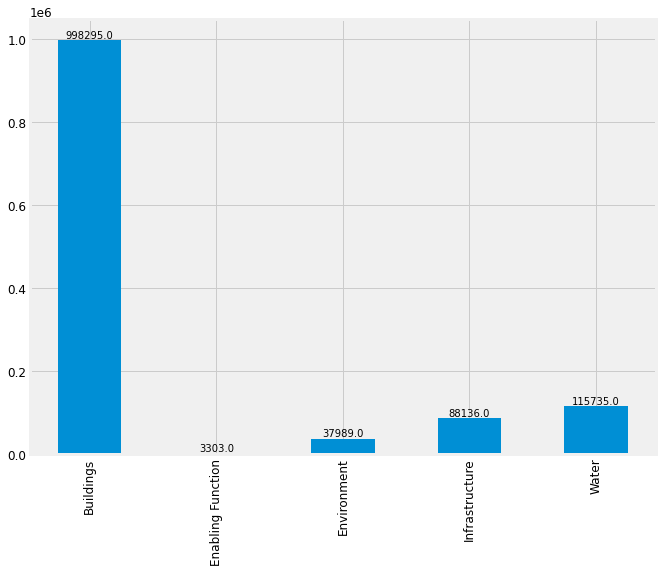

In [36]:
average_nr('Division Short Name')

### What is the contract type with the highest revenue?

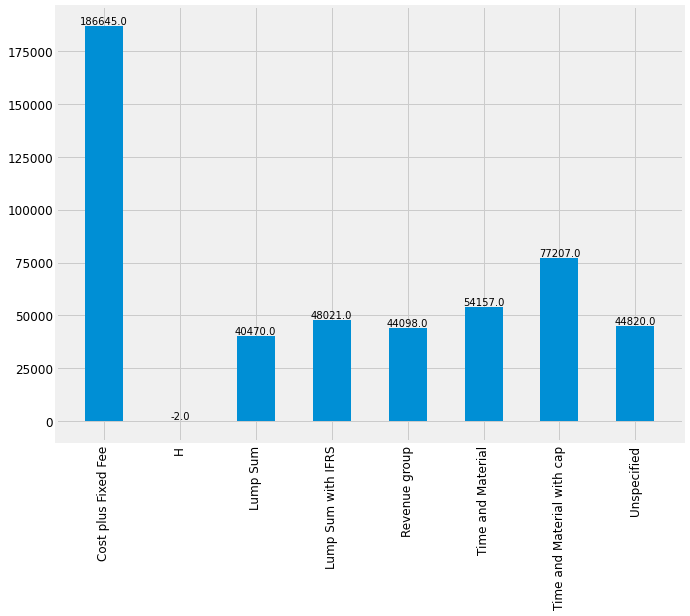

In [37]:
average_nr('Contract Type Name')

### Which sectors have the highest average actual net revenue

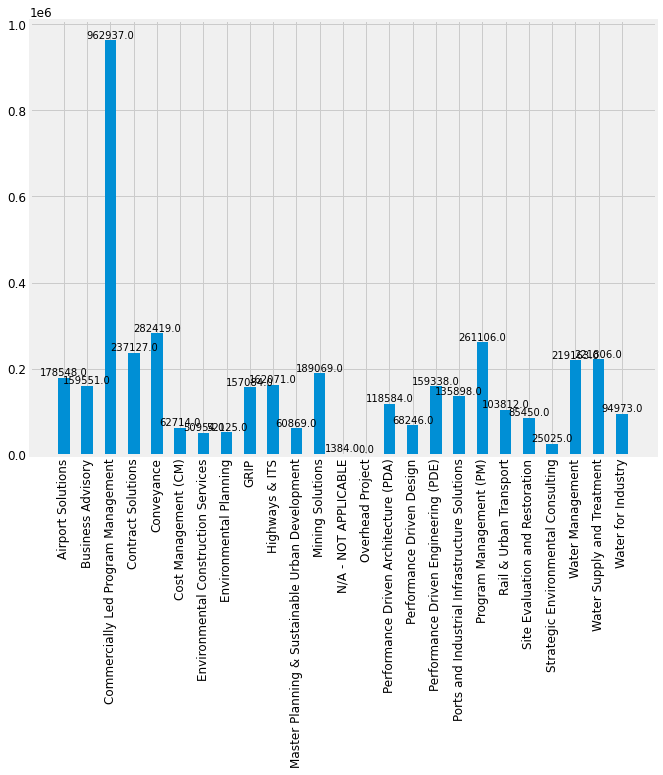

In [38]:
average_nr('Proj_CVP')

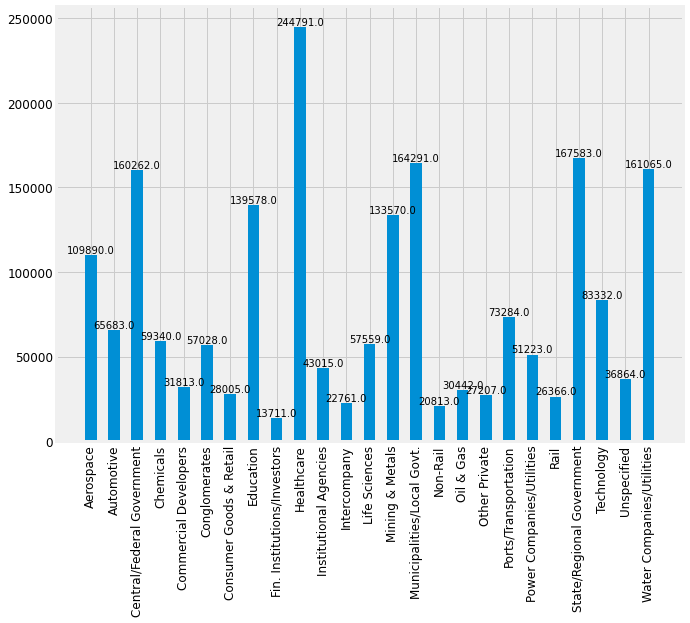

In [39]:
average_nr('Ultimate Customer AUS Market Sector')

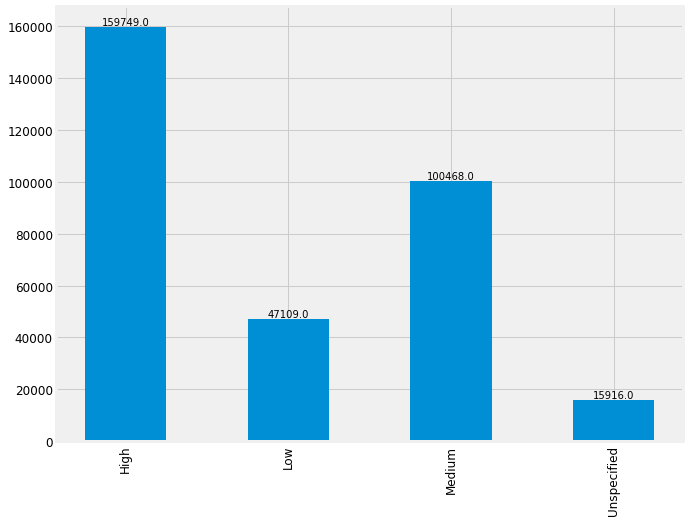

In [40]:
average_nr('Risk Profile')

['Unspecified' 'High' 'Low' 'Medium' nan]


<AxesSubplot:xlabel='Risk Profile'>

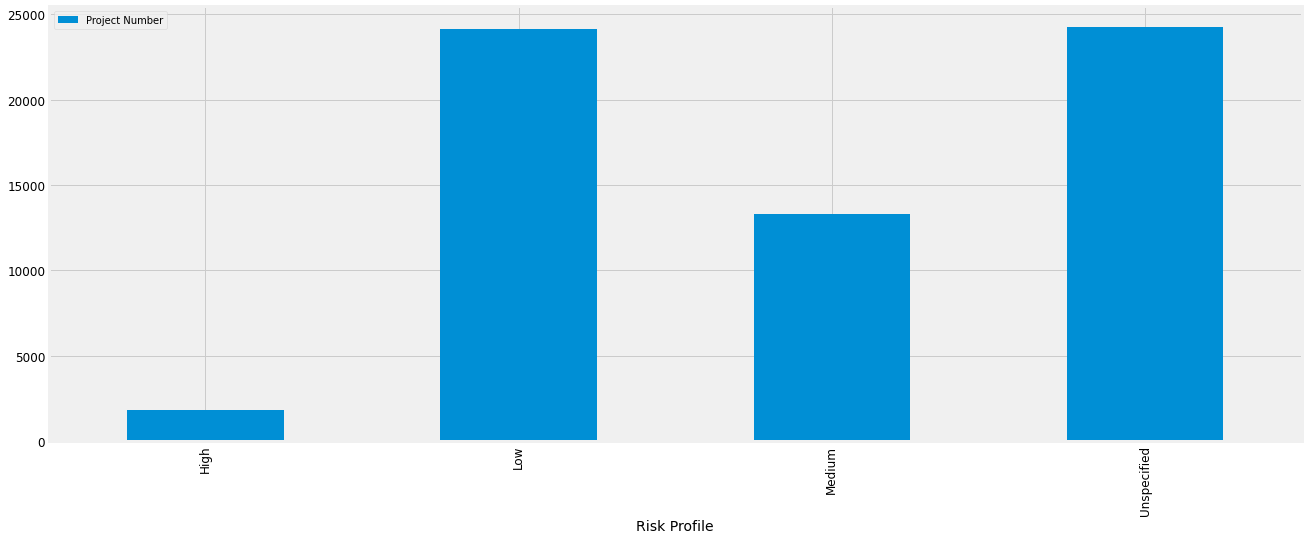

In [41]:
analysis('Risk Profile')

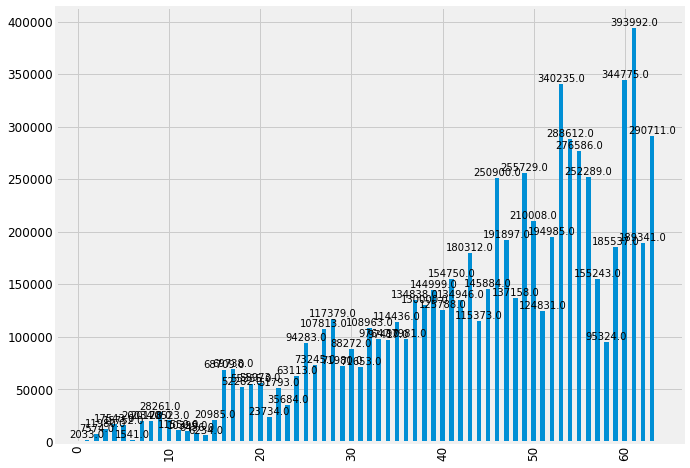

In [42]:
average_nr('Projectduration')

### Make a line graph that plots the actual NR - MTD of df3

In [43]:
df_30012521 = df2[df2['Project Number'] == '30012521']
df_30014265 = df2[df2['Project Number'] == '30014265']
dfdf = pd.concat([df_30012521, df_30014265])

In [ ]:
dfdf.pivot(index="Fiscal Period Code", columns="Project Number", values="Actual Net Revenue - MTD").plot(figsize=(10,8))

#plt.text(1,1,'Pre', transform=ax3.transAxes)

In [1]:
# summarize missing data per column
from numpy import isnan
from numpy import count_nonzero
from pandas import read_csv
from matplotlib import pyplot

In [45]:
# bar chart of the ratio of missing data per column
def plot_col_percentage_missing(values, ix_start=5):
	ratios = list()
	# skip early columns, with meta data or strings
	for col in range(ix_start, values.shape[1]):
		col_data = values[:, col].astype('float32')
		ratio = count_nonzero(isnan(col_data)) / len(col_data) * 100
		ratios.append(ratio)
		if ratio > 90.0:
			print(ratio)
	col_id = [x for x in range(ix_start, values.shape[1])]
	pyplot.bar(col_id, ratios)
	pyplot.show()

In [ ]:
# Top 10 start-up cities development between 1995-2015
l = df['City'].value_counts().head(10).index.tolist();
df2 = df[['City', 'TIME']];
df2 = df2[df2['City'].isin(l)];
k = df2.groupby(['TIME','city']).size().to_frame('count').unstack(level=1);

# plot line chart
k.plot.line(figsize=(10,5), fontsize = 10);

# Add legend, title, axis
plt.legend(sorted(l), fontsize = 10);
plt.ylabel('Count', fontsize = 10);
plt.xlabel('Year', fontsize = 10);
plt.title('Top 10 start-up cities development between 1995-2015', fontsize = 12);

### Let's add a column for the total project duration

In [48]:
def obtain_df(project):
    df_project = df[df['Project Number'] == project]
    df_project = df_project[["Date", "Funding Amount - ITC (Snapshot)",'Actual Net Revenue - MTD']].copy()
    df_project['Backlog_Shifted'] = df_project['Backlog NR'].transform(lambda x:x.shift())
    df_project.reset_index(inplace=True)
    df_project = df_project.loc[:, ~df_project.columns.str.contains('^index')]
    return df_project

In [49]:
def obtain_timeseries(project):
    df_pn = obtain_df(project)
    df_pn = df_pn[['Date', 'Project Number', 'Actual Net Revenue - MTD']].copy()
    df_pn = df_pn.set_index('Fiscal Period Code')
    return df_pn

In [51]:
df_gov_time = df_gov[['Date', 'Project Number', 'Actual Net Revenue - MTD']].copy()
df_gov_time

NameError: name 'df_gov' is not defined

In [ ]:
# reshape the data to get values by time for each label
df = df_gov_time.pivot(index='Fiscal Period Code', columns='Project Number', values='value')

# Replace nans by forward filling existing values
df = df.fillna(method = 'ffill')

# You'll still have to handle the missing values in the beginning of the coloumns
df = df.fillna(method = 'bfill')